In [227]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

In [287]:
# Loading the dataset


In [288]:
df = pd.read_csv('USA_Housing.csv')

In [289]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [290]:
#Step 1 : Check the info

In [291]:
df.info() # -There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [292]:
#Check df describe
df.describe()
#From describe looks like there are no outliers


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [293]:
#Step 3: Check and handle outliers for all numeric columns

In [294]:
#To remove Outlier we can use 1.5 IQR Rule
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    sorted(datacolumn)
    
    #GET Q1 and Q3
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #Calc IQR
    IQR = Q3 - Q1
    
    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)
    
    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)
    
    return lr,ur

In [295]:
#Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
 #      'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
  #    dtype='object')

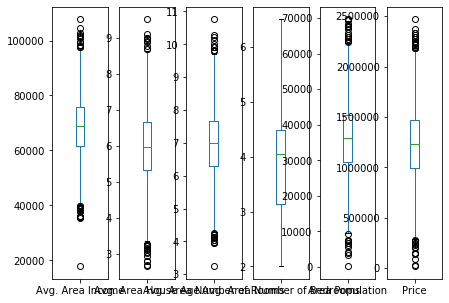

In [296]:
import matplotlib.pyplot as plt
box_df = df.iloc[:,[0,1,2,3,4,5]]
box_df.plot(kind='box', figsize= (7,5),subplots=True, layout=(1,6))
plt.show()

In [297]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [298]:
df.columns.to_list()
#Consider only numeric columns 

num_list = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
for col in num_list:
    print ("Col %r " % col)
    lowerRange,upperRange = outlierDetection(df[col])
    outlier_upper = df[col] > upperRange 
    outlier_lower = df[col] < lowerRange
    if outlier_upper.any() or outlier_lower.any():
        print ("Outlier Detected for %r " % col)
        df.drop(df[(df[col] > upperRange) | (df[col] < lowerRange)].index , inplace=True)
df.set_index(np.arange(0,len(df)) , inplace=True)




Col 'Avg. Area Income' 
Outlier Detected for 'Avg. Area Income' 
Col 'Avg. Area House Age' 
Outlier Detected for 'Avg. Area House Age' 
Col 'Avg. Area Number of Rooms' 
Outlier Detected for 'Avg. Area Number of Rooms' 
Col 'Avg. Area Number of Bedrooms' 
Col 'Area Population' 
Outlier Detected for 'Area Population' 
Col 'Price' 
Outlier Detected for 'Price' 


In [1]:
#Step 4: Handle inappropriate data

In [300]:
#Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
 #      'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
  #    dtype='object')


In [301]:
 #HAndling Inappropriate data
df['Avg. Area Income'].unique() #We are assuming based on domain that all values can be valid data
df['Avg. Area House Age'].unique() #We are assuming based on domain all values are  valid data
df['Avg. Area Number of Rooms'].unique() #We are assuming based on domain that all can be  valid data
df['Avg. Area Number of Bedrooms'].unique() #We are assuming all valus are  valid data
df['Area Population'].unique() #We are assuming based on domain that all can be  valid data
df['Price'].unique() #We are assuming all valus are  valid data
df['Address'].unique() #We are assuming all valus are  valid data


array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [302]:
#Step 5: Check and handle missing data


In [303]:
df.isna().sum() #- From below we can observe that there are no missing values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [304]:
#Step 6: Check and handle categorical data
#     - There are  categorical data address available in this dataset (dropping it for now)

In [305]:
df.drop(['Address'],axis=1,inplace=True)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4851,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4852,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4853,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4854,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [306]:
#Step 7: Check and handle ordinal data
#     - There are no ordinal data available in this dataset

In [307]:
#Step 8: Check and handle pure string data
#     - There are no pure string data available in this dataset

In [308]:
#Step 9: Seperate your data into features and label. Ensure they are in the form of numpy arrays
    
features = df.iloc[:,:-1].values
label = df.Price.values
features


array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [309]:
## Feature Scaling

In [310]:
#Step 10: Perform feature scaling
import seaborn as sns
%matplotlib inline

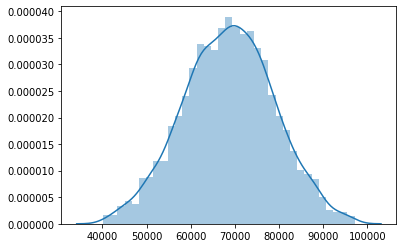

In [311]:
sns.distplot(features[:,[0]]) # Shows the distribution of Avg Area Income

In [312]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ideal_features = sc.fit_transform(features)

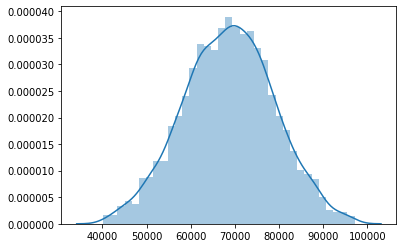

In [313]:
sns.distplot(features[:,[0]]) # Shows the distribution of Avg Area Income

In [314]:
## Feature Elimination Techniques

## Problem Statement - Feature Selection for model building to predict the  Price of a house

## Task 2: USA_Housing.csv

Create a model that can predict the sales figure based on campaigning expenses done

1. All features
2. Correlation analysis
3. RFE
4. Backward Elimination
5. SBM
6. ANOVA


In [315]:
## Step 1: Linear Regression Model considering All Features


In [316]:
#Step 1 in Feature Elimination: Lets now create a linear regression model considering all features
df
features


array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def determine_RS(features, label):
    max_val = 0
    random_state = 0
    hit = 0 # This flag is fired when the test score is greater than train score
    #Since there are 200 records lets try iteration over 200
    for i in range(1,201):
        X_train,X_test,y_train,y_test = train_test_split(features,
                                                        label,
                                                        test_size=0.2,
                                                        random_state = i)

        model = LinearRegression()
        model.fit(X_train,y_train)

        train_score = model.score(X_train,y_train)
        test_score = model.score(X_test,y_test)

        if test_score > train_score:
            hit = 1
            if test_score > max_val:
                max_val = test_score
                random_state = i
            print("Test: {} Train: {} RS: {}".format(test_score,train_score,i))
    return [max_val, random_state, hit]

max_test_score ,random_state, hit = determine_RS(features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model is good")

Test: 0.9136583504910922 Train: 0.9099404139977953 RS: 2
Test: 0.9175583264761431 Train: 0.9090033459660347 RS: 3
Test: 0.9119324000218209 Train: 0.9104156490460907 RS: 6
Test: 0.9165374141062652 Train: 0.9093157219728433 RS: 14
Test: 0.9139742620420956 Train: 0.9098529582134154 RS: 16
Test: 0.9114813747592438 Train: 0.9104887935164828 RS: 17
Test: 0.9208510411634663 Train: 0.9080614833505894 RS: 18
Test: 0.9121590457395509 Train: 0.9103393984185515 RS: 19
Test: 0.9132688262846285 Train: 0.9099024020576029 RS: 20
Test: 0.9127379180244637 Train: 0.9101455585551469 RS: 21
Test: 0.9118805051312847 Train: 0.9104281840120715 RS: 25
Test: 0.9118717022628913 Train: 0.9104142331357862 RS: 26
Test: 0.9130951077377051 Train: 0.9101171808681022 RS: 33
Test: 0.9172122462985487 Train: 0.9089634852211481 RS: 36
Test: 0.9216363028192132 Train: 0.9078914976597006 RS: 39
Test: 0.9155295007723778 Train: 0.9094179256941426 RS: 43
Test: 0.9138063641856713 Train: 0.9098961101935024 RS: 44
Test: 0.911245690

In [318]:
# Now  Create Train Test Splits with the best random state

        def apply_best_RS(random_state, features):
            from sklearn.model_selection import train_test_split
            X_train,X_test,y_train,y_test = train_test_split(features,
                                                             label,
                                                             test_size=0.2,
                                                             random_state = random_state)
            lrModel = LinearRegression()

            lrModel.fit(X_train,y_train)
            #Lets Explore the equation
            print("Co-efficients: ")
            print(lrModel.coef_)
            print("Intercept: ")
            print(lrModel.intercept_)
            # Check the quality of the model
            # We use accuracy check as a mechanism to check the quality of the model
            print ( " Train score %r " % lrModel.score(X_train,y_train))
            # To ensure our model quality is GOOD, ensure your model performs well with Unknown data
            print ( " Test score %r " %lrModel.score(X_test,y_test))

        apply_best_RS(random_state, ideal_features)

Co-efficients: 
[220551.33743356 160085.23436643 117906.93343457   3182.28148025
 145597.40325448]
Intercept: 
1232607.8282059473
 Train score 0.9078914976597006 
 Test score 0.9216363028192027 


## Step 2: Correlation Analysis:

In [319]:
# 1. Correlation Analysis is only applicable for Numeric Columns at Dataset level
# 2. Decide the Percent Threshold  for Correlation Value . 
#      - Select those features who are having %age greater than equal to 50% (Regression)
#      - For Classification, AVOID using this technique (If your BOSS tells you to perform tgis,
#        then the threshold must be 80% or more)
#
# 3. When using correlation analysis on regression, always backup with Backward elimination for double 
#.   confirmation.
# 4. Helps to clear the problem of multi-collinearity (Identifying multiple features with same  corr value
#.   (Suggestion: 0.xxx must be same))

In [320]:
df.corr() #- Indicates that Avg Area Income is the ideal feature

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.025542,-0.024843,0.009722,-0.017319,0.628735
Avg. Area House Age,-0.025542,1.000000,-0.019152,-0.001091,-0.026308,0.439235
Avg. Area Number of Rooms,-0.024843,-0.019152,1.000000,0.466572,-0.001521,0.327427
Avg. Area Number of Bedrooms,0.009722,-0.001091,0.466572,1.000000,-0.024463,0.165503
Area Population,-0.017319,-0.026308,-0.001521,-0.024463,1.000000,0.404683
Price,0.628735,0.439235,0.327427,0.165503,0.404683,1.000000


array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

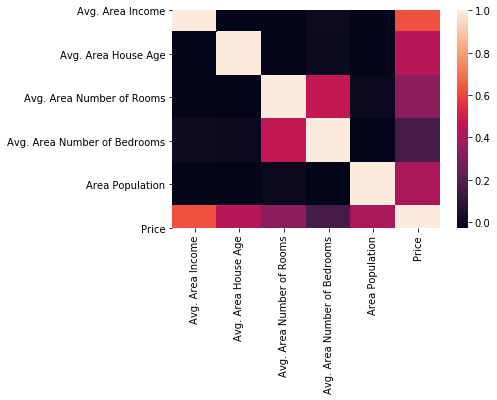

In [321]:
sns.heatmap(df.corr())
features

In [322]:
# From corr data , it suggests to create model from Avg Area income
#Hence let us create a linear regression model out of these this feature alone
corr_features ideal_features[:,[0]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(corr_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from correlation analysis is good")
#Conclusion: HEnce standardization will show no variation in output ; We are getting same resuts as previously
apply_best_RS(random_state, corr_features)

SyntaxError: invalid syntax (<ipython-input-322-0b0f18ff9074>, line 3)

## Step 3: Let us apply RFE analysis: (Recursive Feature Elimination )

In [323]:
#RFE can be applied only to the following algorithm
#
# 1. Regression (Algorithms that support coeff variables)
#    - LinearRegression
#    - SupportVectorRegressor
#.   - DecisionTreeRegressor
#.   - RandomForestRegressor

# 2. Classification (Algorithms that support feature Importance variable)
#    - DecisionTreeClassifier
#    - RandomForestClassifier
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4851,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4852,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4853,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4854,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [324]:
#Given problem statement is definitely a regression problem.

#3. a Liner Regression Model 
ideal_features
label = df.iloc[:,[-1]].values

#3.a Initialize the model's algorithm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def apply_RFE(modelForRFE, features):
    #Apply RFE to model (ALL FEATURES and Label)
    selectFeaturesRFE = RFE(estimator=modelForRFE,
                           step = 1) #Eliminate Feature One by One at each iteration
    selectFeaturesRFE.fit(features,label)
    #Get Features with High Ranking
    print(df.columns)
    print(selectFeaturesRFE.ranking_)
    print(selectFeaturesRFE.support_)

apply_RFE(LinearRegression(), ideal_features)

#Conclusion: Applying Linear Regression suggests to use 'Avg. Area Income', 'Avg. Area House Age'

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
[1 1 3 4 2]
[ True  True False False False]


In [325]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [326]:
#3.b Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
apply_RFE(DecisionTreeRegressor(), ideal_features)

#Conclusion: Applying Decision Tree Regressor suggests to use 'Avg. Area Income', 'Avg. Area House Age'

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
[1 1 3 4 2]
[ True  True False False False]


In [327]:
#3.c Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
apply_RFE(RandomForestRegressor(), ideal_features)

#Conclusion: Applying Random Forest Regressor suggests to use Avg. Area Income', 'Avg. Area House Age'


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
[1 1 3 4 2]
[ True  True False False False]


In [328]:
rfe_features = ideal_features[:,[0,1]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(rfe_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from RFE is good")
apply_best_RS(random_state, rfe_features)

Test: 0.6119493262557729 Train: 0.6002523892347501 RS: 2
Test: 0.6267321976336465 Train: 0.5965750042129065 RS: 3
Test: 0.613156434873188 Train: 0.5996072940997378 RS: 9
Test: 0.611453848350862 Train: 0.6005771317194462 RS: 11
Test: 0.6253689344081259 Train: 0.5963097738629962 RS: 12
Test: 0.6056062542260401 Train: 0.6017821142567258 RS: 14
Test: 0.6214757857450739 Train: 0.5979169391666781 RS: 16
Test: 0.6067243899032884 Train: 0.601357323705386 RS: 17
Test: 0.6284121642125726 Train: 0.595447270422439 RS: 18
Test: 0.6181734105494097 Train: 0.598641830042577 RS: 19
Test: 0.6058098091402861 Train: 0.6015966660749617 RS: 20
Test: 0.617978141420416 Train: 0.5988098242089699 RS: 24
Test: 0.6074375426617593 Train: 0.6015248957776587 RS: 25
Test: 0.6033332970998299 Train: 0.6025707147257863 RS: 30
Test: 0.6066089381039168 Train: 0.6016897406461903 RS: 32
Test: 0.6115174616563741 Train: 0.6001609556474579 RS: 36
Test: 0.6152470509291177 Train: 0.5995981331852855 RS: 37
Test: 0.625709064770884

## Step 4  : Backward Elimination:

In [329]:
# Step1: Perform ALL IN
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values
featuresAllIn = np.append(np.ones((len(df),1)).astype(int) , features, axis=1)
featuresAllIn


array([[1.00000000e+00, 7.95454586e+04, 5.68286132e+00, 7.00918814e+00,
        4.09000000e+00, 2.30868005e+04],
       [1.00000000e+00, 7.92486425e+04, 6.00289981e+00, 6.73082102e+00,
        3.09000000e+00, 4.01730722e+04],
       [1.00000000e+00, 6.12870672e+04, 5.86588984e+00, 8.51272743e+00,
        5.13000000e+00, 3.68821594e+04],
       ...,
       [1.00000000e+00, 6.33906869e+04, 7.25059061e+00, 4.80508098e+00,
        2.13000000e+00, 3.32661455e+04],
       [1.00000000e+00, 6.80013312e+04, 5.53438842e+00, 7.13014386e+00,
        5.44000000e+00, 4.26256202e+04],
       [1.00000000e+00, 6.55105818e+04, 5.99230531e+00, 6.79233610e+00,
        4.07000000e+00, 4.65012838e+04]])

In [330]:
#Step 2 : Decide the SL value

#SL = 0.05

In [331]:
# Step3: Perform OLS (To calc p value of each feature)

import statsmodels.api as stat

#endog --- label column --- numpy array
#exog ---- feature column -- numpy array
#OLS(endog,exog)

model = stat.OLS(endog=label , exog=featuresAllIn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9899.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:56:00   Log-Likelihood:                -62827.
No. Observations:                4856   AIC:                         1.257e+05
Df Residuals:                    4850   BIC:                         1.257e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.622e+06   1.81e+04   -144.666      0.000   -2.66e+06   -2.59e+06
x1            21.5338      0.141    152.974      0.000      21.258      21.810
x2          1.654e+05   1498.533    110.404      0.000    1.63e+05    1.68e+05
x3          1.199e+05   1661.286     72.183      0.000    1.17e+05    1.23e+05
x4          1816.9537   1323.904      1.372      0.170    -778.498    4412.406
x5            15.0059      0.150     99.977      0.000      14.712      15.300
==============================================================================
Omnibus:                        6.239   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.492
Skew:                           0.016   Prob(JB):                       0.0642
Kurtosis:                       2.838   Cond. No.                     9.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
#Step4: Select the feature that has highest p value(max value)
# x4 (Avg. Area Number of Bedrooms was elimninated)


In [333]:
#Step5:
newFeature1 = featuresAllIn[:,[0,1,2,3]]

In [334]:
#Step6:
model = stat.OLS(endog=label , exog=newFeature1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     4303.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:56:01   Log-Likelihood:                -65544.
No. Observations:                4856   AIC:                         1.311e+05
Df Residuals:                    4852   BIC:                         1.311e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.036e+06      3e+04    -67.890      0.000   -2.09e+06   -1.98e+06
x1            21.2843      0.246     86.476      0.000      20.802      21.767
x2          1.614e+05   2620.308     61.614      0.000    1.56e+05    1.67e+05
x3          1.206e+05   2569.483     46.942      0.000    1.16e+05    1.26e+05
==============================================================================
Omnibus:                        6.209   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.495
Skew:                           0.020   Prob(JB):                       0.0641
Kurtosis:                       2.840   Cond. No.                     8.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
#As per backward elimination ,eliminate Avg. Area Number of Bedrooms and use all other features
#Create a Model . Ensure you get accuracy greater than 95%

In [336]:
be_features = ideal_features[:,[0,1,2,4]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(be_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from BE is good")
apply_best_RS(random_state, ideal_features)

Test: 0.9138057478377666 Train: 0.9098671288634356 RS: 2
Test: 0.9175490188035436 Train: 0.9089627990878546 RS: 3
Test: 0.9118401675463153 Train: 0.9104025679711173 RS: 6
Test: 0.9165607749358469 Train: 0.9092677829818847 RS: 14
Test: 0.9142601768786607 Train: 0.9097571515557115 RS: 16
Test: 0.9114435803409042 Train: 0.9104546251674001 RS: 17
Test: 0.9208223993171807 Train: 0.9080249169314488 RS: 18
Test: 0.9123133597698215 Train: 0.9102657124687865 RS: 19
Test: 0.9135019792358839 Train: 0.9098941922629087 RS: 20
Test: 0.9126411445836544 Train: 0.9101324964914037 RS: 21
Test: 0.9120115714245242 Train: 0.9103600091802692 RS: 25
Test: 0.9118523796120399 Train: 0.9103748591549244 RS: 26
Test: 0.9130741085704651 Train: 0.9100789327988812 RS: 33
Test: 0.9172139660127199 Train: 0.9089203119357865 RS: 36
Test: 0.9217643502896814 Train: 0.9078218326766099 RS: 39
Test: 0.910721847432873 Train: 0.9106669748741792 RS: 40
Test: 0.9155473140944054 Train: 0.9093716473441984 RS: 43
Test: 0.9138915257

## Step 5: Select by Model

In [337]:
# 1. Initialize the model's algorithm without standardization
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values
modelForSBM = LinearRegression()

# 2. Apply SBM to model (ALL FEATURES and Label)
from sklearn.feature_selection import SelectFromModel
selectFeaturesSBM = SelectFromModel(modelForSBM)

selectFeaturesSBM.fit(features,label)

# 3. Get Features with High Ranking
print(df.columns)
print(selectFeaturesSBM.get_support())
#SBM states that only 'Avg. Area House Age', 'Avg. Area Number of Rooms', have best features

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
[False  True  True False False]


In [338]:
sbm_features = ideal_features[:,[1,2]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(sbm_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from SBM is good")
#Conclusion: HEnce standardization will show no variation in output ; We are getting same resuts as previously
apply_best_RS(random_state, sbm_features)

Test: 0.32779727338051956 Train: 0.30014847380919885 RS: 3
Test: 0.31339672860656553 Train: 0.303726309155242 RS: 5
Test: 0.33315657756013184 Train: 0.298429286982255 RS: 6
Test: 0.33053785389480805 Train: 0.29848476043152083 RS: 9
Test: 0.3076986303981012 Train: 0.3049278221036368 RS: 13
Test: 0.33676680821719707 Train: 0.2972993963940972 RS: 17
Test: 0.3300296072701326 Train: 0.2991239275022014 RS: 19
Test: 0.32733577870595865 Train: 0.2995750364909252 RS: 20
Test: 0.33058228583150756 Train: 0.29859510995512006 RS: 21
Test: 0.32386228003686623 Train: 0.3011869631579067 RS: 23
Test: 0.30911504888130636 Train: 0.3046391395849377 RS: 31
Test: 0.3095930090103082 Train: 0.30471759742809224 RS: 32
Test: 0.3156426554017334 Train: 0.30323500826292804 RS: 34
Test: 0.33110576812735426 Train: 0.29879935410993586 RS: 36
Test: 0.3185015776642085 Train: 0.30252050929840835 RS: 37
Test: 0.30859455687296955 Train: 0.3050116773259389 RS: 38
Test: 0.32346862464141335 Train: 0.30102920803270583 RS: 39


In [339]:
# 1. Initialize the model's algorithm with standardization
label = df.iloc[:,[-1]].values
modelForSBM = LinearRegression()

# 2. Apply SBM to model (ALL FEATURES and Label)
from sklearn.feature_selection import SelectFromModel
selectFeaturesSBM = SelectFromModel(modelForSBM)

selectFeaturesSBM.fit(ideal_features,label)

# 3. Get Features with High Ranking
print(df.columns)
print(selectFeaturesSBM.get_support())
#SBM states that only Avg. Area Income' 'Avg. Area House Age',  and Area Population have best features

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
[ True  True False False  True]


In [340]:
sbm_features = ideal_features[:,[0,1,4]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(sbm_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from SBM is good")
#Conclusion: HEnce standardization will show no variation in output ; We are getting same resuts as previously
apply_best_RS(random_state, sbm_features)

Test: 0.8012718081902477 Train: 0.7818401480873 RS: 2
Test: 0.790029889373679 Train: 0.7847902111117463 RS: 3
Test: 0.7906718950079764 Train: 0.7844411582982114 RS: 4
Test: 0.7918533577751974 Train: 0.7842321581150871 RS: 6
Test: 0.7864084670079416 Train: 0.7857163817865436 RS: 10
Test: 0.7881651966277582 Train: 0.7853136805010488 RS: 11
Test: 0.7954154805757386 Train: 0.7831875802106455 RS: 12
Test: 0.804675461861603 Train: 0.7810628209938011 RS: 16
Test: 0.8012064584967981 Train: 0.7816268291247791 RS: 18
Test: 0.794105543345272 Train: 0.7837739337561761 RS: 24
Test: 0.7953596278406094 Train: 0.783508459833311 RS: 25
Test: 0.787406427360498 Train: 0.7854739613083724 RS: 26
Test: 0.7863839287835809 Train: 0.7857727293370166 RS: 27
Test: 0.7867998575700232 Train: 0.7854432797487539 RS: 28
Test: 0.7988410886509217 Train: 0.7822529265497586 RS: 36
Test: 0.7882906707341012 Train: 0.7852636248793996 RS: 37
Test: 0.798476082391617 Train: 0.7826134219464058 RS: 39
Test: 0.7984535125760327 Tr

In [341]:
## Step 6: ANOVA in Feature Elimination

In [342]:
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import f_classif
#Regression ----> f_regression
#Classification --> f_classif

#When working on ANOVA, the percentile value must be 50
selectFeaturesANOVA = SelectPercentile(percentile=50, score_func=f_regression)

selectFeaturesANOVA.fit(features,label)

selectFeaturesANOVA.get_support()

#Anova also suggest  that TV and Radio are the best features

array([ True,  True, False, False, False])

In [343]:
anova_features = ideal_features[:,[0,1]] #Let us use standardized data as it will help saving  training time
label = df.Price.values
max_test_score ,random_state, hit = determine_RS(anova_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from ANOVA is good")
apply_best_RS(random_state, anova_features)

Test: 0.6119493262557729 Train: 0.6002523892347501 RS: 2
Test: 0.6267321976336465 Train: 0.5965750042129065 RS: 3
Test: 0.613156434873188 Train: 0.5996072940997378 RS: 9
Test: 0.611453848350862 Train: 0.6005771317194462 RS: 11
Test: 0.6253689344081259 Train: 0.5963097738629962 RS: 12
Test: 0.6056062542260401 Train: 0.6017821142567258 RS: 14
Test: 0.6214757857450739 Train: 0.5979169391666781 RS: 16
Test: 0.6067243899032884 Train: 0.601357323705386 RS: 17
Test: 0.6284121642125726 Train: 0.595447270422439 RS: 18
Test: 0.6181734105494097 Train: 0.598641830042577 RS: 19
Test: 0.6058098091402861 Train: 0.6015966660749617 RS: 20
Test: 0.617978141420416 Train: 0.5988098242089699 RS: 24
Test: 0.6074375426617593 Train: 0.6015248957776587 RS: 25
Test: 0.6033332970998299 Train: 0.6025707147257863 RS: 30
Test: 0.6066089381039168 Train: 0.6016897406461903 RS: 32
Test: 0.6115174616563741 Train: 0.6001609556474579 RS: 36
Test: 0.6152470509291177 Train: 0.5995981331852855 RS: 37
Test: 0.625709064770884